# Task 1

In [1]:
'''Вариант 4
x = [-1, 0, 2, 4]
y = [-2, 1, -1, 0]

Z = (x + 3*y)/(3*x**2 + y**2 + 1)
'''


def qZ(x, y): # оценка качества хромосомы
    return(x + 3*y)/(3*x**2 + y**2 + 1)
def qsumZ(Z): # суммарное качество хромосом
    return sum(Z)
def exchangeScheme(oldX, oldY, sortedId):# представленная схема
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]

    Y[3] = oldY[sortedId[1]]

    return X, Y

def sorting(Z): # сортировка массива качества хромосом
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
    return sortedId

def evoStep(X, Y, Z): # функция для шага эволюции
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X, Y, Z

def evoSteps(X, Y, stepsNum = 4):
    results = []

    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]

        X, Y, Z = evoStep(X, Y, arrZ)

        X, Y = exchangeScheme(X, Y, sorting(Z))

        results.append([X, Y, qsumZ(arrZ), arrZ])

    return X, Y, results

#объявляем массив хромосом
X = [-1, 0, 2, 4]
Y = [-2, 1, -1, 0]

#реализация алгоритма
results = evoSteps(X, Y)

for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z:  {max(qualityArrZ)}')


max_1_step: 0.6352040816326531
max_2_step: -1.002857142857143
max_3_step: 2.150989010989011
max_4_step: 2.2142857142857144
max Z:  1.5


# Task 2

Лучший выбранный маршрут: [1, 2, 4, 3, 6, 5, 1]
Длина лучшего выбранного маршрута: 154
Длины всех рассмотренных маршрутов: [155, 150, 165, 180, 154]


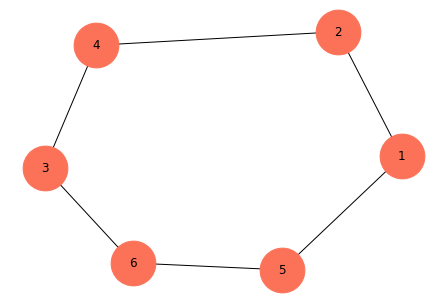

In [2]:
from math import e
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import networkx as nx

distances = [(1, 2, 25),
(1, 3, 41),
(1, 4, 38),
(1, 5, 27),
(1, 6, 20),
(2, 3, 21),
(2, 4, 34),
(2, 5, 39),
(2, 6, 17),
(3, 4, 24),
(3, 5, 40),
(3, 6, 22),
(4, 5, 21),
(4, 6, 11),
(5, 6, 22)]

V = [1, 3, 5, 4, 6, 2, 1]
Z = [(3, 4),
(4, 6),
(5, 6),
(2, 4)]
P = [41, 60, 85, 60]
T = 100
#функуция вероятности
def probability(delta, T):
    return 100 * e ** (-delta/T)
#функция изменения температуры
def reductTemp(prevT):
    nextT = 0.5 * prevT

    return nextT
#построим граф по заданным координатам
graph = nx.Graph() #создание пустого графа
graph.add_weighted_edges_from(distances) #добавляем вес ребер

#отрисуем граф с заданными вершинами
#nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

#вычисление длины ребра
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
#вычисление длины маршрута
def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
    return sum(edges)

#одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

#перестановка в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)# нахождение длины пути
    arrSum = [sumLength]# массив сумм длин

#циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) #новый маршрут после перестановки
        newS = routeLength(newV, distances)# длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength #разница между длиной нового и старого маршрутов
        #в случае, если разница между длинами больше 0, то вычисляем вероятность
        if deltaS > 0:
            p = probability(deltaS, T)# подсчет вероятности

            #если заданная вероятность попадает в интервал от 0 до р, то новый маршрут выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        T = reductTemp(T) #вычисление температуры

    return V, arrSum

#отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)

    graph1 = nx.Graph() # создание пустого графа

    graph1.add_weighted_edges_from(newDistances) # добавление весов рёбер

    nx.draw_kamada_kawai(graph1, node_color = '#fb7258', node_size = 2000, with_labels = True) # отрисовка графа с заданными вершинами

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) # отрисовка лучшего маршрута